In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
# load data set
data = pd.read_csv(r'C:\Users\Rohit94\Documents\project_2023\Nifty-50-Prediction\TCS.csv',index_col="Date",parse_dates=True)

In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-11,7.1200,7.20,6.98,7.13,6.665000,347000
2019-06-12,7.1300,7.28,7.11,7.25,6.777174,206800
2019-06-13,7.3100,7.38,7.22,7.37,6.889348,246200
2019-06-14,7.3600,7.51,7.28,7.44,6.954783,224700
2019-06-17,7.4500,7.49,7.31,7.38,6.898696,185700
...,...,...,...,...,...,...
2024-06-05,0.6500,0.73,0.63,0.71,0.710000,328700
2024-06-06,0.7100,0.75,0.69,0.70,0.700000,321800
2024-06-07,0.7100,0.75,0.66,0.67,0.670000,264200


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,6.272011,6.455429,6.085873,6.261706,6.213136,5.450168e+05
std,4.134897,4.254559,4.008708,4.128614,4.144692,5.943601e+05
min,0.633400,0.630000,0.610000,0.630000,0.630000,1.487000e+03
25%,3.080000,3.190000,2.965000,3.085000,3.037500,2.404500e+05
50%,4.775000,4.880000,4.630000,4.780000,4.623587,3.768500e+05
75%,9.512500,9.852500,9.105000,9.520000,9.520000,6.205000e+05
max,19.150000,19.309999,17.780001,19.190001,19.190001,6.846200e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2019-06-11 to 2024-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [6]:
# check if data set contains missing values
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
data1=data.reset_index()['Open']

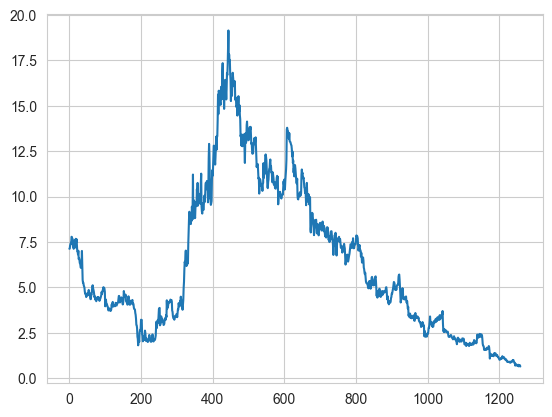

In [8]:
import matplotlib.pyplot as plt
plt.plot(data1)

In [9]:
data2=data.reset_index()['Close']

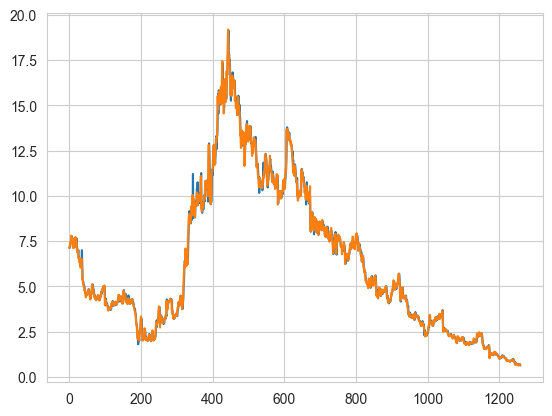

In [10]:
import matplotlib.pyplot as plt
plt.plot(data1)
plt.plot(data2)

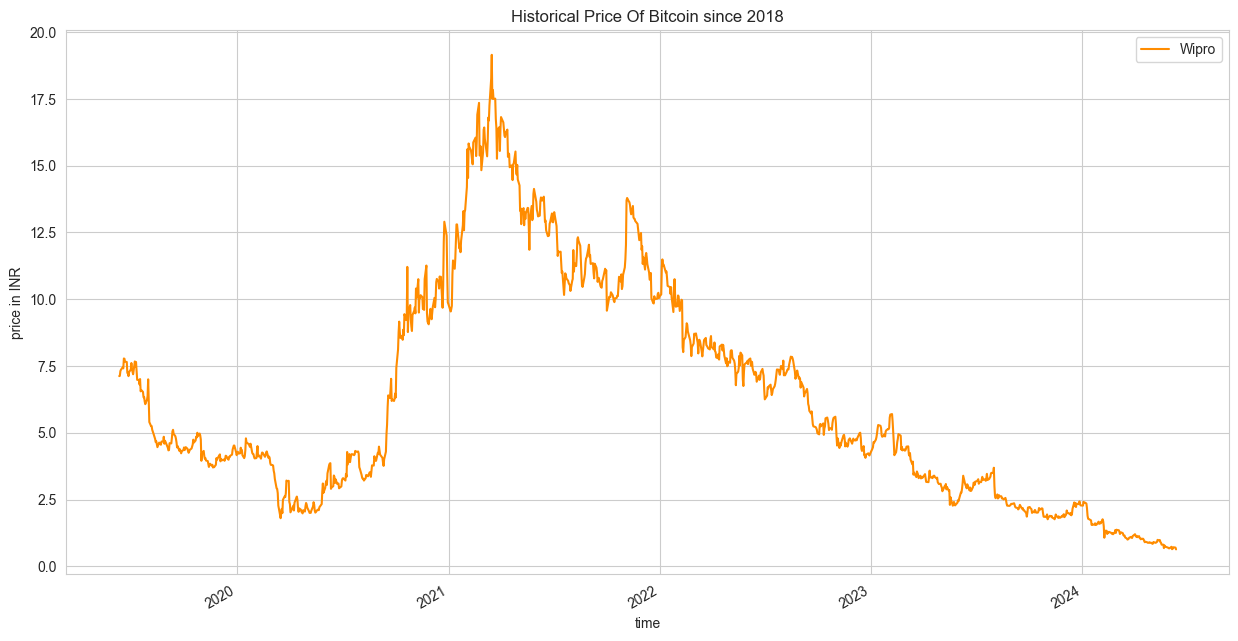

In [11]:
plt.figure(figsize=(15,8))
(data['Open']).plot(color='darkorange', label='Wipro')

plt.xlabel('time')
plt.ylabel('price in INR')
plt.title('Historical Price Of Bitcoin since 2018')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

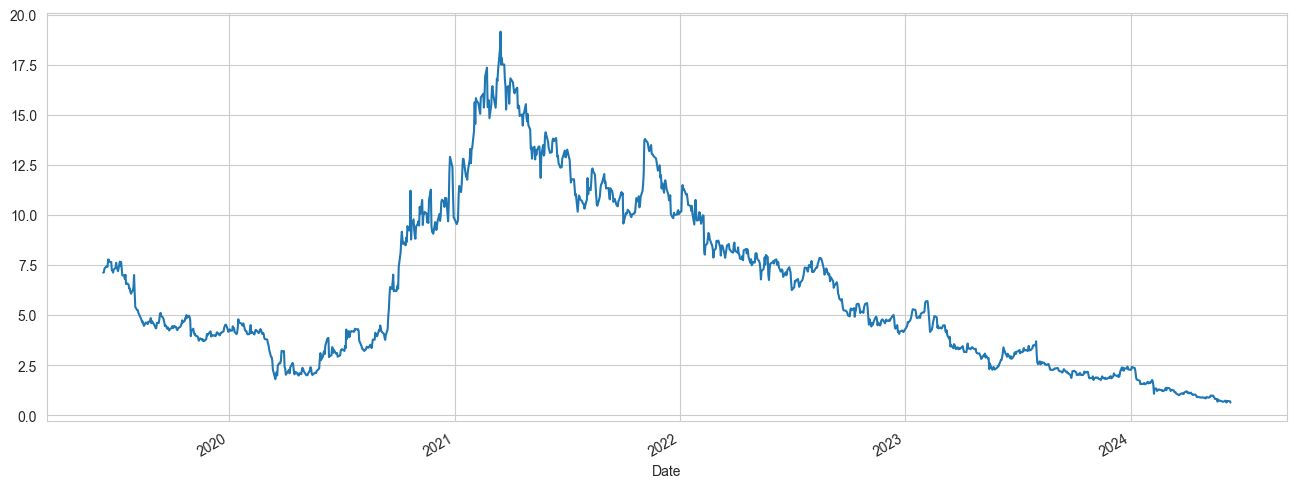

In [12]:
data['Open'].plot(figsize=(16,6))

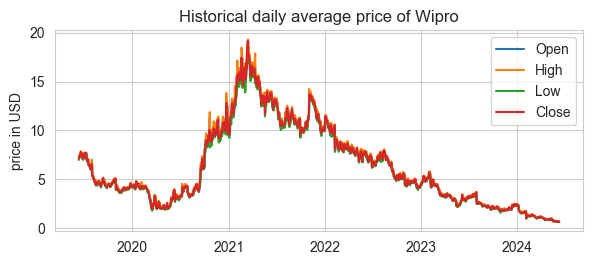

In [13]:
plt.figure(figsize=(15, 12))
plt.subplot(4,2,1)
plt.plot(data[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Wipro')
plt.legend(['Open','High','Low','Close'])

<Axes: xlabel='Date'>

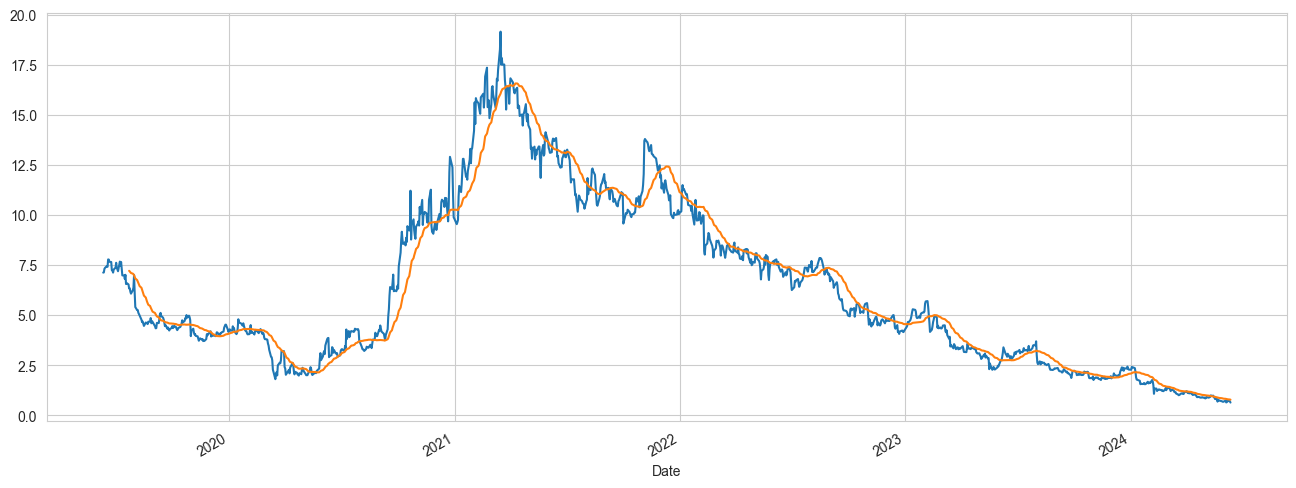

In [14]:
data['Open'].plot(figsize=(16,6))
data.rolling(window=30).mean()['Close'].plot()

In [15]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
#data = data.dropna().drop(['Symbol','Series','Prev Close','VWAP','Turnover','Turnover','Trades','Deliverable Volume','%Deliverble'], axis=1)

In [17]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-11,7.1200,7.20,6.98,7.13,6.665000,347000
2019-06-12,7.1300,7.28,7.11,7.25,6.777174,206800
2019-06-13,7.3100,7.38,7.22,7.37,6.889348,246200
2019-06-14,7.3600,7.51,7.28,7.44,6.954783,224700
2019-06-17,7.4500,7.49,7.31,7.38,6.898696,185700
...,...,...,...,...,...,...
2024-06-05,0.6500,0.73,0.63,0.71,0.710000,328700
2024-06-06,0.7100,0.75,0.69,0.70,0.700000,321800
2024-06-07,0.7100,0.75,0.66,0.67,0.670000,264200


In [18]:
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping



In [19]:
sc = MinMaxScaler()
train_set=sc.fit_transform(data['Close'][:2456].values.reshape(-1,1))

In [20]:
past_days = 30

In [21]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [22]:
# define input sequence
timeseries_data = data['Close'][:6100].tolist()
# choose a number of time steps
n_steps = past_days
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [23]:
X.shape

(1230, 30)

In [24]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [25]:
# define model
callback = [EarlyStopping(monitor='loss', mode='auto',)]
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',)
# fit model
model.fit(X, y, epochs=150, verbose=1)

Epoch 1/150
39/39 [==============================] - 2s 11ms/step - loss: 8.0444
Epoch 2/150
39/39 [==============================] - 0s 11ms/step - loss: 0.6103
Epoch 3/150
39/39 [==============================] - 0s 11ms/step - loss: 0.5572
Epoch 4/150
39/39 [==============================] - 0s 11ms/step - loss: 0.3421
Epoch 5/150
39/39 [==============================] - 0s 11ms/step - loss: 0.3165
Epoch 6/150
39/39 [==============================] - 0s 11ms/step - loss: 0.3487
Epoch 7/150
39/39 [==============================] - 0s 10ms/step - loss: 0.3723
Epoch 8/150
39/39 [==============================] - 0s 10ms/step - loss: 0.2656
Epoch 9/150
39/39 [==============================] - 0s 10ms/step - loss: 0.2433
Epoch 10/150
39/39 [==============================] - 0s 11ms/step - loss: 0.2750
Epoch 11/150
39/39 [==============================] - 0s 11ms/step - loss: 0.2241
Epoch 12/150
39/39 [==============================] - 0s 11ms/step - loss: 0.1950
Epoch 13/150
39/39 [=====

39/39 [==============================] - 0s 10ms/step - loss: 0.1253
Epoch 102/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1064
Epoch 103/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1213
Epoch 104/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1275
Epoch 105/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1092
Epoch 106/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1050
Epoch 107/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1029
Epoch 108/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1140
Epoch 109/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1149
Epoch 110/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1059
Epoch 111/150
39/39 [==============================] - 0s 11ms/step - loss: 0.1112
Epoch 112/150
39/39 [==============================] - 0s 10ms/step - loss: 0.1159
Epoch 113/150
39/3

39/39 [==============================] - 0s 4ms/step


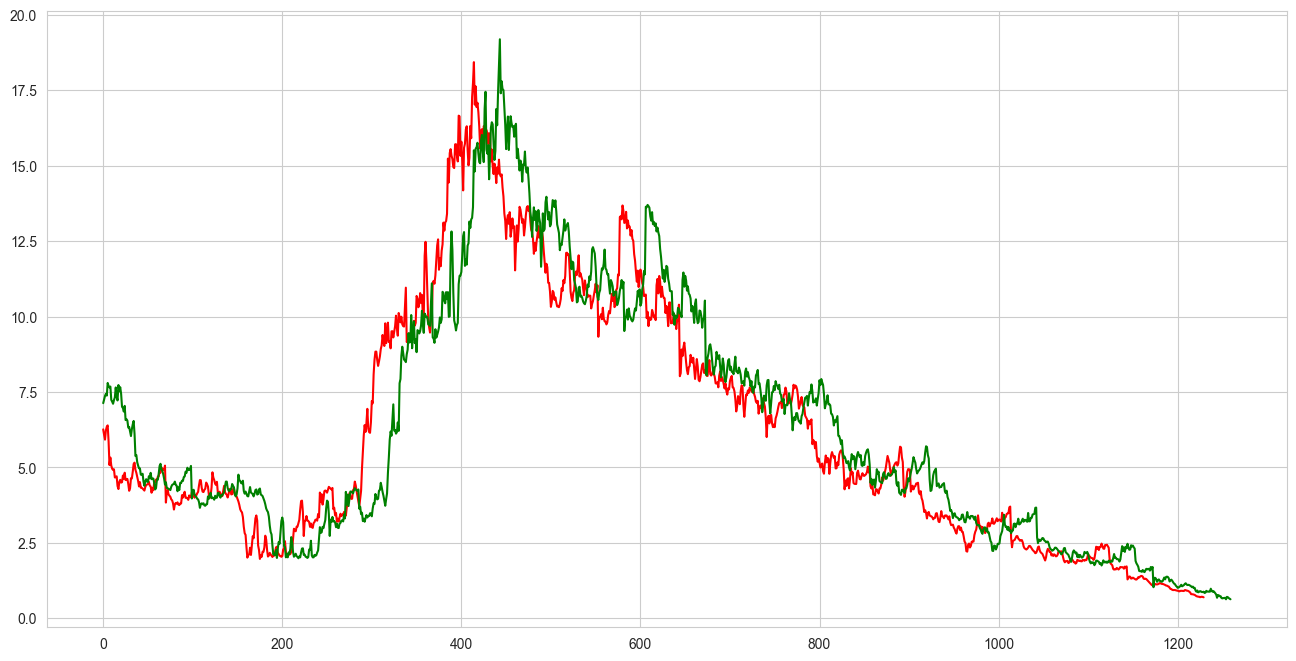

In [26]:
plt.figure(figsize=(16,8))
plt.plot(model.predict(X),color='red',label='Predicted')
plt.plot(data['Close'].values,color='green',label='Actual')

In [27]:
model.predict(X)

39/39 [==============================] - 0s 4ms/step


array([[6.260767 ],
       [6.078486 ],
       [5.9212046],
       ...,
       [0.7133377],
       [0.7070458],
       [0.6953363]], dtype=float32)

In [28]:
data['Close']

Date
2019-06-11    7.13
2019-06-12    7.25
2019-06-13    7.37
2019-06-14    7.44
2019-06-17    7.38
              ... 
2024-06-05    0.71
2024-06-06    0.70
2024-06-07    0.67
2024-06-10    0.65
2024-06-11    0.63
Name: Close, Length: 1260, dtype: float64

In [29]:
yhat2=model.predict(X)
yhat2.shape

39/39 [==============================] - 0s 4ms/step


(1230, 1)

In [30]:
X.shape

(1230, 30, 1)

In [31]:
y.shape

(1230,)

In [32]:
from sklearn.metrics import r2_score
print("R2 aquare",r2_score(y, yhat2))

from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error", mean_absolute_error(y, yhat2))

from sklearn.metrics import mean_squared_error
mean_squared_error= mean_squared_error(y, yhat2)
print("Mean Squared Erorr", mean_squared_error)

from math import sqrt
rootMeanSquaredError = sqrt(mean_squared_error)
print("Root Mean Squared Error",rootMeanSquaredError)



R2 aquare 0.9942604225052506
Mean Absolute Error 0.19596679380517354
Mean Squared Erorr 0.09998804548537502
Root Mean Squared Error 0.31620886370463275


In [33]:
model_json=model.to_json()
with open("lstmModel_final.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("weights_final.h5")